# Modelos de regresión lineal

![BLR](https://upload.wikimedia.org/wikipedia/commons/e/ed/Bayes_icon.svg)

Hasta ahora hemos visto modelos de regresión lineal, usando inferencia exacta para la estimación de la distribución posterior de los parámetros, bajo un caso particular (suponiendo la varianza de la dispersión conocida). Si quisiéramos asumir previas distintas a la normal para los parámetros, incluyendo una previa para el parámetro de varianza, entonces la inferencia exacta de la distribución posterior se vuelve prácticamente imposible.

En este tema, estudiamos el uso de muestreo de la distribución posterior usando técnicas Montecarlo, dándonos la libertad de elegir la previa que mejor represente nuestro conocimiento de la situación.

> **Objetivos:**
> - Revisitar modelos de predicción lineal desde una perspectiva de Montecarlo.

> **Referencias:**
> 
> - Statistical Rethinking: A Bayesian Course with Examples in R and Stan (2nd edition) - Richard McElreath.

## 1. Predicción lineal

Lo que acabamos de ver es un modelo Gaussiano para la altura de una población de adultos. Sin embargo, este modelo no tiene el componente de *regresión*.

Es común que queramos modelar como el resultado de cierta variable se relaciona con otra(s) variable(s), llamada(s) **predictor(es)**. Si el predictor tiene alguna asociación estadística con la variable de interés, la podemos usar para *predecir* dicha variable.

En este caso estudiaremos como incluir estos predictores de forma lineal en el modelo. 

Seguiremos usando los datos de los adultos en la población, pero esta vez, veremos como la altura se relaciona con el peso:

In [ ]:
# Importar pandas y pyplot


In [ ]:
# Leer datos (separados por ;)


In [ ]:
# Extraer datos de adultos


In [ ]:
# Algunas filas


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [ ]:
# Separar en train y test - para después


Text(0, 0.5, 'Altura (cm)')

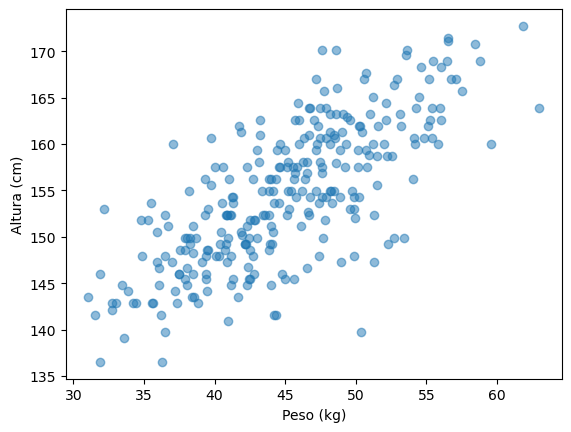

In [ ]:
# Scatter plot - train


Del gráfico anterior, observamos que en definitiva hay una relación marcada entre la altura y el peso. Es decir, conocer el peso de una persona nos ayuda a predecir su altura.

**¿Cómo adecuamos el modelo de la altura para incluir el peso como predictor?**

La estrategia es modificar el parámetro $\mu$ de la distribución Gaussiana, para que sea una función lineal del predictor. Ahora, para los parámetros de esta función, tendremos que declarar distribuciones previas.

De forma que, teníamos:

$$
\begin{align}
\begin{array}{lcl}
h_i & \sim & \text{Normal}(\mu, \sigma) \\
\mu & \sim & \text{Normal}(170, 20) \\
\sigma & \sim & \text{Uniform}(0, 50)
\end{array}
\end{align}
$$

Ahora, sea $w_i$ el peso de la persona $i$ y sean $\bar{w}$ el promedio de todos los pesos. De esta forma:

$$
\begin{align}
\begin{array}{lcl}
h_i & \sim & \text{Normal}(\mu_i, \sigma) \\
\mu_i & = & \alpha + \beta(w_i - \bar{w}) \\
\alpha & \sim & \text{Normal}(170, 20) \\
\beta & \sim & \text{Normal}(0, 10) \\
\sigma & \sim & \text{Uniform}(0, 50)
\end{array}
\end{align}
$$

*¿Qué significa esto?*

- Como antes, la primera expresión es la verosimilitud (probabilidad de los datos). Es casi la misma expresión, nada más notemos que cambiamos la media general $\mu$, por una media $\mu_i$ para cada observación. Es decir, la media depende de los valores específicos de cada observación.

- La segunda expresión, corresponde al modelo lineal. $\mu$ ya no es un parámetro que estimemos, sino una relación determinista (notar el símbolo $=$ en lugar de $\sim$) a los nuevos parámetros $\alpha$ y $\beta$, y que depende de la variable observada $w_i$.

  ¿Porqué incluir como predictor $w_i - \bar{w}$ en lugar de símplemente $w_i$? Algo importante cuando modelamos es poder entender los parámetros que estamos introduciendo. Notemos que de la manera en que especificamos el modelo $\mu=\alpha$ cuando $w_i=\bar{w}$; es decir, $\alpha$ es el valor esperado de la altura cuando el peso es promedio.

  ¿Y qué pasa con $\beta$? Bueno, pues el parámetro $\beta$ es el cambio esperado en la altura, cuando el peso cambia $1$ unidad (kg).

- Las demás expresiones, como antes, son las previas de nuestros parámetros, que deberemos ajustar con una debida simulación predictiva previa de ser necesario.

In [ ]:
# Importart scipy.stats

# Importar numpy


Text(0, 0.5, 'Altura (cm)')

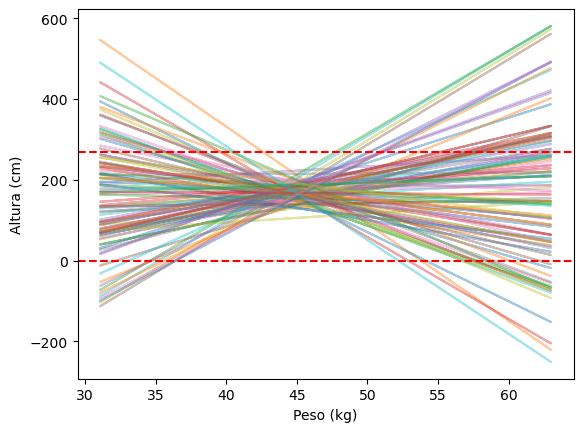

In [ ]:
# Simulación previa predictiva
# Número de muestras

# Vector de pesos (w)

# Peso promedio (w_bar)

# Muestrass de alpha, beta y mu

# Gráfico de muestras de mu vs peso


Observamos que usando estas previas, las la altura promedio puede llegar a tomar valores bastante extremos para valores normales del peso. Podemos hacer algo mejor.

De la gráfica de puntos, observamos que la relación entre la altura y el peso es positiva. Una manera común de restringir un parámetro a que sea positivo es usando la distribución $\text{Log-Normal}$. Si definimos $\beta$ como $\text{Log-Normal}(0, 1)$, significa que el logaritmo de $\beta$ tiene una distribución $\text{Normal}(0, 1)$:

$$
\beta \sim \text{Log-Normal}(0, 1)
$$

In [ ]:
# Densidad lognormal


Signature:       stats.lognorm(*args, **kwds)
Type:            lognorm_gen
String form:     <scipy.stats._continuous_distns.lognorm_gen object at 0x00000201D23F2370>
File:            c:\users\esjim\anaconda3\envs\mebo2024_v4\lib\site-packages\scipy\stats\_continuous_distns.py
Docstring:      
A lognormal continuous random variable.

As an instance of the `rv_continuous` class, `lognorm` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(s, loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, s, loc=0, scale=1)
    Probability density function.
logpdf(x, s, loc=0, scale=1)
    Log of the probability density function.
cdf(x, s, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, s, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, s, loc=0, scale=1)
    Survival function  (also defined as ``1 - cdf``, but `s

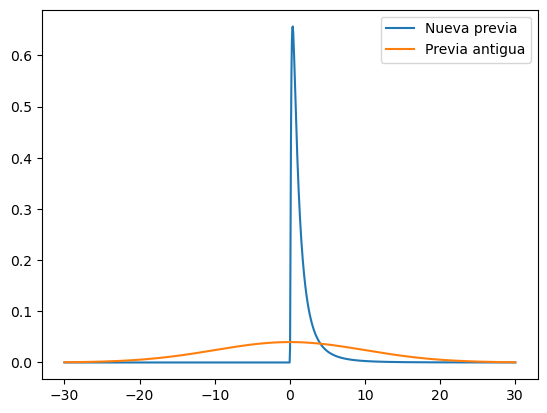

In [ ]:
# Gráfico de comparación de previas para beta


Text(0, 0.5, 'Altura (cm)')

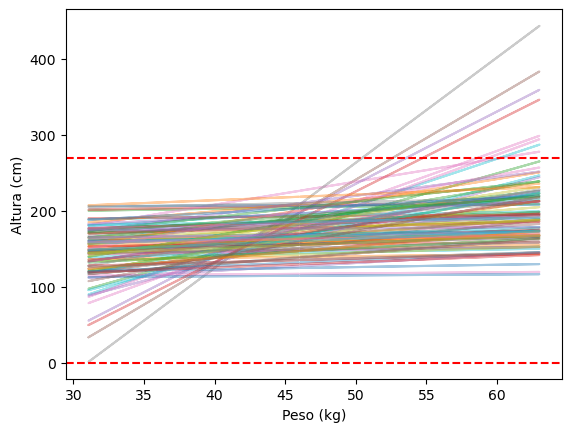

In [ ]:
# Simulación previa predictiva
# Número de muestras

# Vector de pesos (w)

# Peso promedio (w_bar)

# Muestrass de alpha, beta y mu

# Gráfico de muestras de mu vs peso

¡Esto se ve mucho mejor!

De forma que nuestro modelo completo es:

$$
\begin{align}
\begin{array}{lcl}
h_i & \sim & \text{Normal}(\mu_i, \sigma) \\
\mu_i & = & \alpha + \beta(w_i - \bar{w}) \\
\alpha & \sim & \text{Normal}(170, 20) \\
\beta & \sim & \text{Log-Normal}(0, 1) \\
\sigma & \sim & \text{Uniform}(0, 50)
\end{array}
\end{align}
$$

**Estimemos la distribución posterior usando MCMC:**

In [ ]:
# Importar pymc

# Importar arviz


In [ ]:
# Peso

# Peso promedio

# Modelo


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


In [ ]:
# Distribución posterior de los parámetros


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,154.615,0.312,154.053,155.210,0.004,0.003,6205.0,3170.0,1.0
sigma,5.151,0.217,4.743,5.557,0.003,0.002,5789.0,2918.0,1.0
beta,0.894,0.048,0.804,0.985,0.001,0.000,6015.0,2570.0,1.0


array([<Axes: title={'center': 'alpha'}>,
       <Axes: title={'center': 'sigma'}>,
       <Axes: title={'center': 'beta'}>], dtype=object)

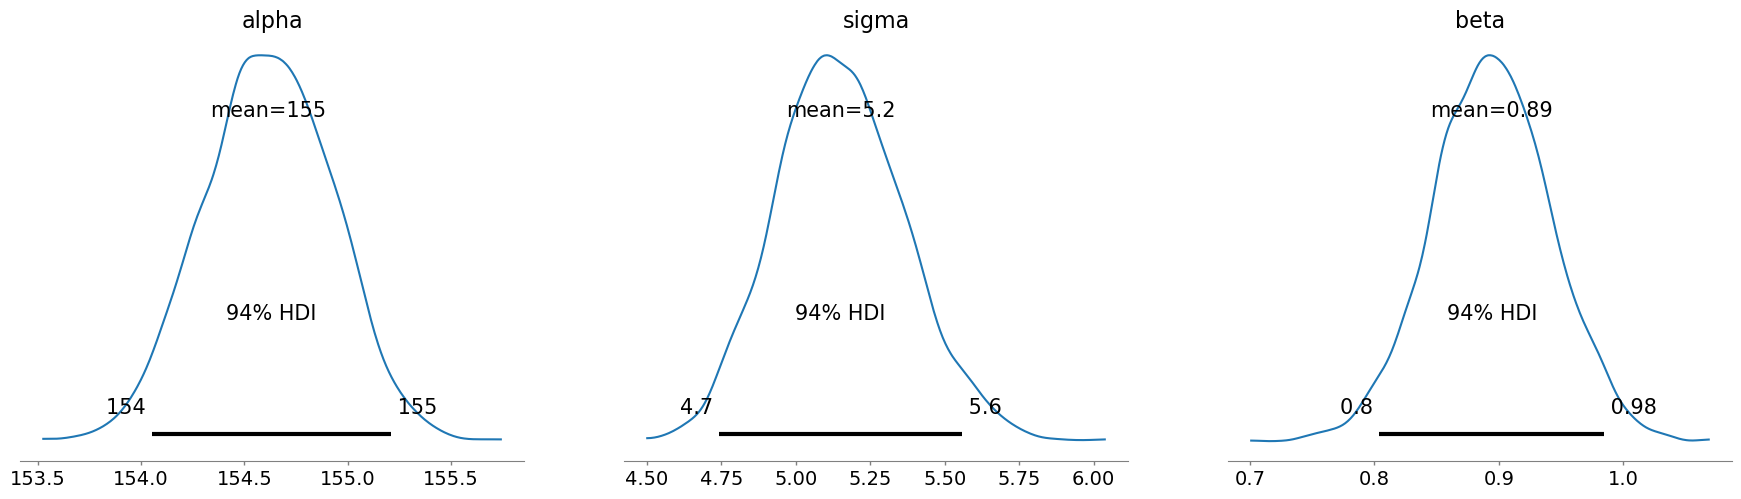

In [ ]:
# az.plot_posterior


¿Qué podemos decir?

- La altura promedio, al peso promedio está alrededor de 155 cm.

- Por cada 1 kg adicional, se espera que la altura sea ~0.90 cm mayor.

- El 94% de la probabilidad de la distribución posterior de $\beta$ yace entre 0.82 y 0.98, lo que indica que valores cercanos a cero y valores mayores a uno, no son compatibles con los datos y el modelo.

**Predicciones con la posterior**

La idea principal de este modelo es hacer predicciones con él. Veamos como hacerlo.

Lo primero que podríamos hacer es tomar el promedio de las muestras de $\alpha$ y $\beta$, y graficar la relación promedio:

In [ ]:
# Objeto de muestreo


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

Text(0, 0.5, 'Altura (cm)')

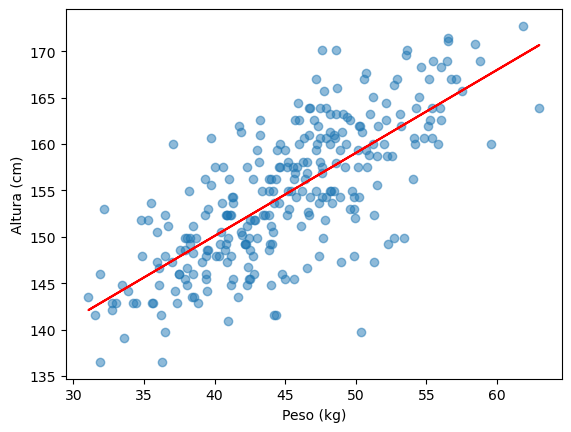

In [ ]:
# Relación promedio


Esta relación promedio (al tratarse el modelo de una normal) no es más que la línea promedio; la línea más plausible en el conjunto infinito de lineas en la distribución posterior.

Sin embargo, a esto le podemos añadir la incertidumbre alrededor de la media, graficando algunas líneas muestreadas de la posterior:

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [ ]:
# posterior.to_dataframe()


alpha     sigma      beta
chain draw                                
0     0     154.265615  5.495197  0.866794
      1     155.042069  4.960891  0.864955
      2     154.943902  5.051807  0.902137
      3     154.811674  5.143902  0.839687
      4     154.868259  5.375891  0.971347

Text(0, 0.5, 'Altura (cm)')

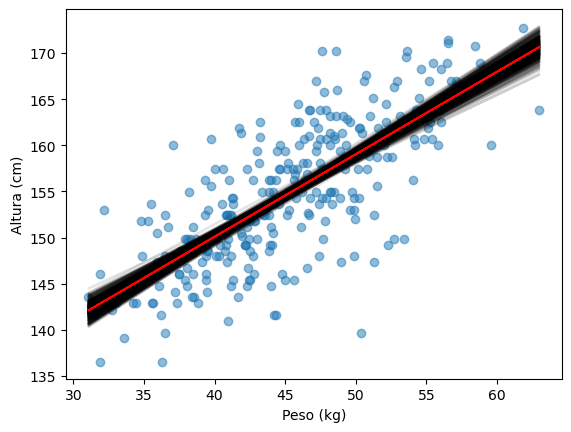

In [ ]:
# Algunas muestras de la posterior


Una pregunta que nos podríamos hacer es, ¿Cuánto es la altura promedio de una persona de 60kg?. Una vez más, podemos usar las muestras de la posterior para responder a esta pregunta:

In [ ]:
# mu at 60


(4000,)

<Axes: >

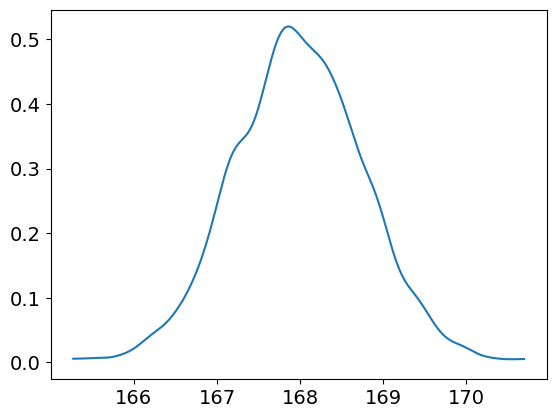

In [ ]:
# kde plot


In [51]:
# az.hdi


La altura promedio (89%) está entre 167 cm y 169 cm (condicional al modelo y los datos), dado que el peso es 60 kg.

**¿Y $\sigma$?**

Recordemos que el modelo de la altura era:

$$
h_i \sim \text{Normal}(\mu_i, \sigma)
$$

y aunque hasta ahora solo hemos hablado de $\mu$, la variación fuera del promedio es bastante importante.

Primero, generamos las muestras de predicción. Como antes, podríamos hacerlo a mano, pero pymc lo puede hacer por nosotros:

In [ ]:
# Peso

# Peso promedio

# Modelo


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.


In [ ]:
# Con el modelo entrenado predecimos sobre datos nuevos
w = test["weight"].values
# Generamos muestras predictivas de la posterior
with height_model_predictive:
    # Actualizamos valores de w
    pm.set_data({"w": w})
    height_post_pred = pm.sample_posterior_predictive(
        idata,
        var_names=["mu", "altura"],
        return_inferencedata=True,
        predictions=True,
        extend_inferencedata=True
    )

Sampling: [altura]


c:\Users\esjim\anaconda3\envs\mebo2024_v4\lib\site-packages\pymc\backends\arviz.py:659: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  converter.nchains = idata_orig["posterior"].dims["chain"]
c:\Users\esjim\anaconda3\envs\mebo2024_v4\lib\site-packages\pymc\backends\arviz.py:660: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  converter.ndraws = idata_orig["posterior"].dims["draw"]


Inference data with groups:
	> posterior
	> predictions
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data
	> predictions_constant_data

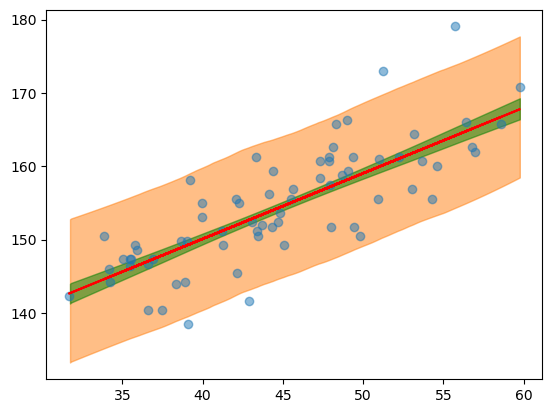

In [ ]:
# Intervalo de credibilidad de la altura

# Intervalo de credibilidad de la altura promedio

# Línea promedio

# Nube de puntos


### Evaluación

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
r2_score(test["height"], height_post_pred.predictions["mu"].mean(("chain", "draw")))

0.632594612123295

In [72]:
mean_squared_error(test["height"], height_post_pred.predictions["mu"].mean(("chain", "draw")))

24.018910467939545

In [ ]:
lower, higher = np.array(az.hdi(height_post_pred.predictions["altura"], hdi_prob=0.94)["altura"]).T

<xarray.DataArray 'altura' (hdi: 2, obs_id: 70)> Size: 1kB
array([[152.47090794, 141.83575012, 135.43468812, 139.40134105,
        136.07909194, 136.32970196, 147.60185175, 149.17473546,
        157.25063918, 153.35227653, 147.17492446, 151.10133321,
        147.22900432, 154.41810421, 135.96765017, 155.01214496,
        140.33833794, 148.55065101, 158.33969578, 147.39822693,
        137.49710992, 142.43663831, 148.01713965, 144.29211917,
        155.66439485, 141.95010866, 148.68728706, 144.70257183,
        139.06066353, 152.34038556, 140.03255166, 138.46112247,
        139.86114623, 136.69953463, 148.14571113, 146.90158378,
        139.24233947, 137.54724393, 141.78173793, 144.01514659,
        152.14631737, 149.65005736, 143.65547651, 135.88905193,
        140.04488373, 153.16047002, 145.19030283, 147.63522697,
        145.07187585, 133.00936713, 145.18457711, 149.67465682,
        144.95672387, 143.20693927, 137.99680866, 148.17085477,
        143.99230734, 149.4605122 , 154.54571067, 136.34254396,
        138.09728411, 150.87075588, 143.17683465, 135.50543212,
        144.26362438, 146.32159307, 142.79402422, 143.52682724,
        143.37854559, 136.54049287],
       [171.53261718, 161.58749093, 154.37012966, 158.80358205,
        155.49404372, 155.74751552, 167.09975948, 168.34726383,
        176.12439207, 172.47833819, 166.90433133, 170.88765836,
        166.17416422, 173.7829473 , 155.59340356, 174.94234835,
        159.80864803, 168.23556045, 178.0461376 , 166.58669323,
        156.61366671, 161.77025757, 167.62070853, 163.67392011,
        175.35743194, 161.94270226, 167.96345709, 164.13979449,
        159.08250113, 171.84429665, 159.24804574, 157.94395163,
        158.86204288, 156.0071516 , 167.19525107, 166.58811109,
        158.39308931, 156.71684272, 161.14764972, 163.26253978,
        171.93510206, 169.33458091, 163.02376182, 154.82473928,
        159.23881927, 172.90014386, 164.65283169, 166.70916975,
        164.45873777, 152.7880227 , 164.32006843, 168.82682724,
        164.15158174, 162.16034002, 157.29948736, 167.55042435,
        163.53490896, 168.65404172, 174.31834314, 155.62882447,
        157.15164589, 170.16207797, 162.3649494 , 154.66834857,
        163.32216319, 165.98081962, 162.4889693 , 162.38443914,
        162.97707235, 155.98782931]])
Coordinates:
  * obs_id   (obs_id) int32 280B 0 1 2 3 4 5 6 7 8 ... 62 63 64 65 66 67 68 69
  * hdi      (hdi) <U6 48B 'lower' 'higher'

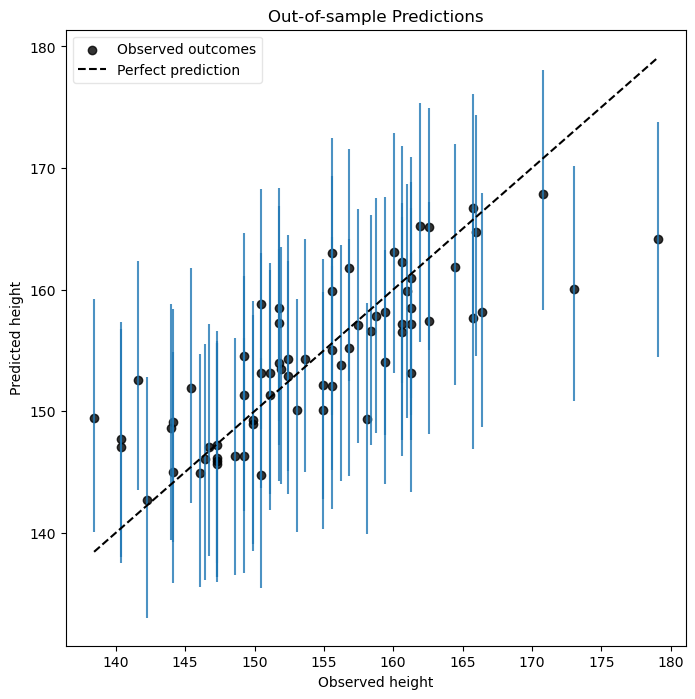

In [99]:
_, ax = plt.subplots(figsize=(8, 8))

model_preds = height_post_pred.predictions

# uncertainty about the estimates:
ax.vlines(
    test["height"].values,
    *az.hdi(model_preds)["altura"].transpose("hdi", ...),
    alpha=0.8,
)

# actual outcomes:
ax.scatter(
    x=test["height"].values,
    y=model_preds["altura"].mean(("chain", "draw")),
    marker="o",
    color="k",
    alpha=0.8,
    label="Observed outcomes",
)

x_min = test["height"].min()
x_max = test["height"].max()
ax.plot([x_min, x_max], [x_min, x_max], linestyle="--", color="k", label="Perfect prediction")
ax.set_xlabel("Observed height")
ax.set_ylabel("Predicted height")
ax.set_title("Out-of-sample Predictions")
ax.legend(fontsize=10, frameon=True, framealpha=0.5);

In [84]:
((lower < test["height"].values) & (test["height"].values < higher)).mean()

0.9428571428571428

## 2. Comentarios finales

Como en el módulo 1, podemos usar este mismo tipo de modelos lineales en los parámetros para representar relaciones no lineales entre los datos. Podemos usar polinomios, o cualquier otro tipo de representaciones no lineales que nos interese.

Por ejemplo, si consideraramos todos los datos, incluyendo los de los niños:

Text(0, 0.5, 'Height (cm)')

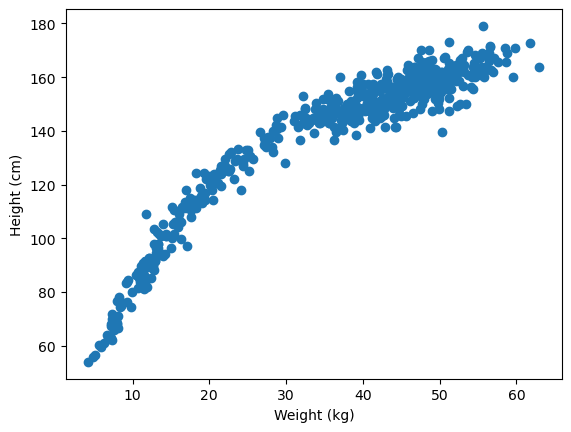

In [32]:
# Scatter plot
plt.scatter(datos_altura["weight"], datos_altura["height"])
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")

Observamos una relación cúbica. **Tarea**

**Ayuda**. Estandarizar el peso antes.

# Anuncios

## 1. Quiz tema 8 el martes 19 de nov.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>